In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
#from functools import reduce

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [25]:
pkls_path = pkls = r'D:\Tesis\ResEleCon-MX\pickles'
concentrador = pd.read_pickle(pkls_path + '/total_energy.pkl')

In [30]:
col = ['CVE_ZM','NOM_ZM','folioviv','foliohog','CVE_MUN','upm','est_socio','sexo_jefe','edad_jefe','educa_jefe','tot_integ','ing_cor',
       'num_cuarto','tenencia','gasto_tri_ele','gasto_tri_gas','gasto_tri_lpg','gasto_tri_total_gas','lpg_kwh',
       'g_natural_kwh','kwh','gas']
ener = concentrador[col].copy()

# Adding variables

In [63]:
ener['Total'] = ener[['gas','kwh']].sum(axis=1, min_count=1)

# Table 1

### Size original

In [64]:
len(ener)

31100

In [65]:
print('Electricity data complete: ',len(ener.dropna(subset=['kwh'])))
print('Gas data complete: ',len(ener.dropna(subset=['gas'])))

Electricity data complete:  28239
Gas data complete:  20102


### Size gas and electricity complete

In [66]:
ener.dropna(subset=['kwh','gas'], inplace=True)
print('Complete samples (gas and electricity): ',len(ener))

Complete samples (gas and electricity):  18588


In [67]:
ener.isnull().sum(axis = 0)

CVE_ZM                     0
NOM_ZM                     0
folioviv                   0
foliohog                   0
CVE_MUN                    0
upm                        0
est_socio                  0
sexo_jefe                  0
edad_jefe                  0
educa_jefe                 0
tot_integ                  0
ing_cor                    0
num_cuarto                 0
tenencia                   0
gasto_tri_ele              0
gasto_tri_gas          15048
gasto_tri_lpg           3390
gasto_tri_total_gas        0
lpg_kwh                 3390
g_natural_kwh          15048
kwh                        0
gas                        0
Total                      0
dtype: int64

In [68]:
ener.to_pickle(pkls_path + '/energy_final.pkl')

# Figure 1
## Maps

In [69]:
file = r'D:\Tesis\Datos\shapefiles\ZM\ZM_built-up.shp'

metro_map = gpd.read_file(file)
metro_map["geometry"] = metro_map.centroid
metro_map = metro_map[metro_map.CVE_ZM.isin(ener['CVE_ZM'])]

metro_map.to_file("shapes/ZM_points.shp") 

# Table 2 

In [70]:
concentrador['completeness'] = concentrador[['kwh','gas']].sum(axis=1, min_count=2)

In [71]:
table2 = concentrador.groupby(['CVE_ZM','NOM_ZM']).agg('count')[['foliohog','completeness']]
table2.to_clipboard()
table2.head()

,,foliohog,completeness
CVE_ZM,NOM_ZM,,
1.01,Aguascalientes,1246,691
2.01,Ensenada,202,154
2.02,Mexicali,417,296
2.03,Tijuana,905,686
3.01,La Paz,616,193


# Figure 2
Absolute energy consumption

In [72]:
ener.head()

,CVE_ZM,NOM_ZM,folioviv,foliohog,CVE_MUN,upm,est_socio,sexo_jefe,edad_jefe,educa_jefe,tot_integ,ing_cor,num_cuarto,tenencia,gasto_tri_ele,gasto_tri_gas,gasto_tri_lpg,gasto_tri_total_gas,lpg_kwh,g_natural_kwh,kwh,gas,Total
0,1.01,Aguascalientes,100013601,1,1001,1,3,1,74,4,3,76403.70,6,4,600.0,3000.0,NaN,3000.0,NaN,1578.284091,158.129476,1578.284091,1736.413567
2,1.01,Aguascalientes,100013603,1,1001,1,3,1,39,10,2,580697.74,7,4,375.0,NaN,2100.0,2100.0,0.558142,NaN,125.505879,0.558142,126.064021
3,1.01,Aguascalientes,100013604,1,1001,1,3,2,70,8,2,46252.71,5,4,480.0,378.0,NaN,378.0,NaN,198.863795,145.822996,198.863795,344.686791
5,1.01,Aguascalientes,100026701,1,1001,2,3,2,41,11,4,237742.54,5,4,420.0,NaN,1500.0,1500.0,0.358023,NaN,139.032066,0.358023,139.390089
6,1.01,Aguascalientes,100026703,1,1001,2,3,2,57,9,1,32606.55,5,4,375.0,NaN,3150.0,3150.0,0.837213,NaN,125.505879,0.837213,126.343093


In [ ]:
ener_ordered = ener.sort_values(by=['Total'], ignore_index=True)
ener_ordered_cut = ener_ordered[0:18587]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


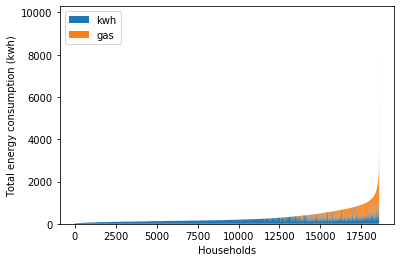

In [89]:
# Data
x=ener_ordered.index
y=[ener_ordered.kwh.to_list(),ener_ordered.gas.to_list()]

# Plot
fig, ax = plt.subplots()
ax.stackplot(x,y, labels=['kwh','gas'])
plt.legend(loc='upper left')

ax.set_xlabel('Households')
ax.set_ylabel('Total energy consumption (kwh)')

#plt.savefig('images/graphs/fig2.eps', format='eps', bbox_inches='tight')
plt.show()

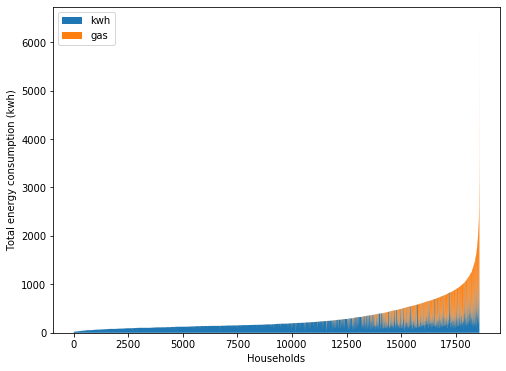

In [87]:
# Data
x=ener_ordered_cut.index
y=[ener_ordered_cut.kwh.to_list(),ener_ordered_cut.gas.to_list()]

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(x,y, labels=['kwh','gas'])
plt.legend(loc='upper left')

ax.set_xlabel('Households')
ax.set_ylabel('Total energy consumption (kwh)')

plt.show()

# Figure 3
Gas vs electricity

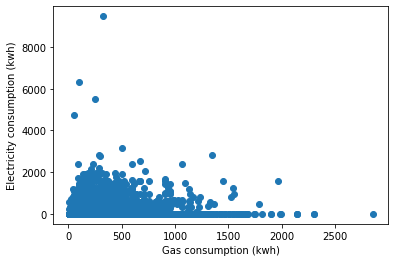

In [93]:
fig, ax = plt.subplots()
ax.scatter(ener['kwh'], ener['gas'])
    
ax.set_ylabel('Electricity consumption (kwh)')
ax.set_xlabel('Gas consumption (kwh)')

plt.savefig('images/graphs/fig3.eps', format='eps', bbox_inches='tight')

plt.show()